Implementação da Regressão Linear utilizando o método do gradiente descendente.

Para completar esta tarefa, você deve implementar o código que falta para 3 funções abaixo.
- Uma função de custo, para calcular o erro entre o valor previsto pelo modelo e o valor objetivo.
- Uma função de gradiente, para calcular o valor da derivada da função de custo para os parâmetros w e b.
- Uma função de gradiente descendente, para executar o método do gradiente descendente.

Também são fornecidos um pequeno dataset de casas visto em aula e valores para testar a execução do gradiente descendente.


Importando a biblioteca numpy

In [21]:
import numpy as np

Primeira função a ser desenvolvida é a função para computar o custo do erro do modelo no dataset.

Lembrando que erro para um exemplo do dataset é dado pela seguinte equação:

$$
    (\hat{y} - y)^2
$$

E o custo total é dado pela seguinte equação:

$$
1/2m\sum_{i=1}^m ((\hat{y_{i}} - y_{i})^2)
$$

onde
$$
\hat{y_{i}} = f_{w,b}(x_{i}) = w*x_{i}+b
$$

In [22]:
def funcao_custo(x,y,w,b):
    """
    Parâmetros:
    x (ndarray (m,))  : Dataset, m exemplos com 1 feature
    y (ndarray (m,))  : valores objetivo para cada exemplo do dataset
    w (escalar)       : parâmetro w do modelo
    b (escalar)       : parâmetro b do modelo
    
    Retorno:
    custo_total (escalar): custo total dos parâmetros w e b no dataset X
    """
    custo_total = 0
    m = x.shape[0] #m = total de exmplos


    for i in range(m):
        custo_total += (w*x[i]+b-y[i])**2
    
    return (1/2 *m) * custo_total

A função gradiente calcula o valor das derivadas da função de custo em relação a **w** e **b**.

A derivada da função de custo em relação a **w** é: 

$$
1/m\sum_{i=1}^m (\hat{y_{i}} - y_{i})*x_{i}
$$

A derivada da função de custo em relação a **b** é:

$$
1/m\sum_{i=1}^m (\hat{y_{i}} - y_{i})
$$


In [23]:

def gradiente(x,y,w,b):
    """
    Função para computar o gradiente com parâmetros específicos w e b
    Parâmetros:
    x (ndarray (m,)) : Dataset, m exemplos com 1 feature
    y (ndarray (m,)) : valores objetivo
    w (escalar)      : parâmetro w do modelo 
    b (escalar)      : parâmetro b do modelo

    Retorno:
    derivada_w (escalar): valor da derivada da função de custo em relação a w
    derivada_b (escalar): valor da derivada da função de custo em relação a b
    """

    m = x.shape[0] #m = total de exemplos
    derivada_w = 0
    derivada_b = 0

    #código inicia aqui

    for i in range(m):   
        derivada_w += (w*x[i] + b - y[i])*x[i]
        derivada_b += (w*x[i] + b - y[i])

    #código termina aqui
    
    return derivada_w, derivada_b

A função **gradiente_descendente** minimiza o custo para os parâmetros **w** e **b**.

O gradiente descendente funciona como abaixo.

Repetir até convergir:

{
$$w = w - \alpha * derivada_w$$

$$b = b - \alpha * derivada_b$$
}

Lembrando que **w** e **b** precisam ser atualizados simultaneamente.

Para o nosso caso, teremos um novo parâmetro, chamado de ***épocas***, que define um número máximo de iterações para o método, para evitar que fique tentando convergir infinitamente.



In [24]:
def gradiente_descendente(x,y,w_inicial,b_inicial,learning_rate,epocas):
    """
    Função para encontrar os parâmetros w e b que minimizam o custo de erro do nosso modelo
    
    Parâmetros:
    x (ndarray (m,))         :  Dataset, m exemplos com n features
    y (ndarray (m,))         : valores objetivos
    w_inicial (escalar)      : parâmetro b inicial para começar o método
    b_inicial (escalar)      : parâmetro b inicial para começar o método
    learning_rate (escalar)  : taxa de aprendizado do nosso algoritmo (geralmente menor que 0.01)
    epocas(escalar)          : numero máximo de iterações para o método do gradiente descente
    
    Retorno:
    w (escalar): melhor valor encontrado para w
    b (escalar): melhor valor encontrado para b
    """
    
    m = x.shape[0] #m = total de exmplos

    w = w_inicial
    b = b_inicial

    #código inicia aqui

    for i in range(m):
        w = w - learning_rate * (2/m) * (w*x[i] + b - y[i]) * x[i]
        b = b - learning_rate * (2/m) * (w*x[i] + b - y[i])

        if(w == b):
            break

    #código encerra aqui

    return w,b

x é o dataset de casas com 1 feature (tamanho da casa (em m²))

y são os valores alvo para o dataset (preço da casa em milhares de reais)

In [25]:
x=np.array([45,60,100,200,300])
y=np.array([200,300,500,1000,1500])

Você pode começar tentando entender como o array numpy é representado.

In [26]:
x.shape

(5,)

In [27]:
y.shape

(5,)

Abaixo alguns valores iniciais para você poder testar seu código

In [28]:
w_inicial = 0
b_inicial = 0
learning_rate = 0.00001
epocas = 1000

E agora o cálculo dos valores **w** e **b** com o método do gradiente descendente implementado

In [29]:
w,b = gradiente_descendente(x,y,w_inicial,b_inicial,learning_rate,epocas)

custo_modelo = funcao_custo(x,y,w,b)

Valor de w

In [30]:
w

2.474979929801208

Valor de b

In [31]:
b

0.010032686141735997

Custo do modelo com o dataset de casas de treinamento

In [32]:
custo_modelo

2308434.0956454324

Vamos tentar predizer o valor de uma casa de 150 m²

In [33]:
casa=150
valor_nova_casa = w*casa + b

valor_nova_casa

371.25702215632293

Para mostrar estes resultados em um gráfico, podemos utilizar o pacote pyplot da biblioteca matplotlib

In [34]:
import matplotlib.pyplot as plt

Vamos calcular os valores das casas do dataset para poder plotar

In [35]:
y_hats = np.zeros(x.shape[0]) #inicializamos um vetor de tamanho m (total de exmplos)
y_hats = x * w + b

Agora definimos o nome dos eixos do gráficos, plotamos uma linha mostrando a relação existente no dataset entre custo das casas vs tamanho, bem como os valores previstos pelo modelo para os exemplos do dataset e o exemplo da nova casa de 150 metros quadrados.

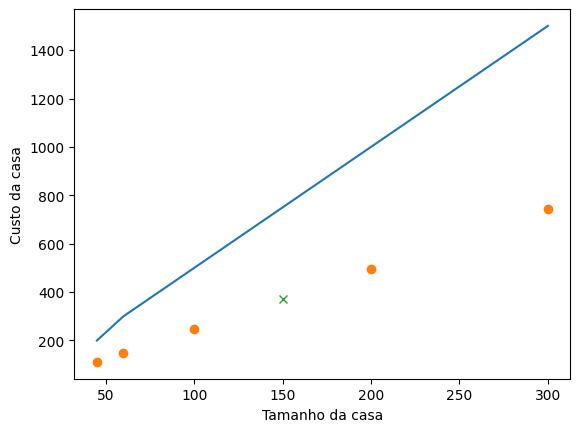

In [36]:
plt.ylabel("Custo da casa") #nome do eixo y
plt.xlabel("Tamanho da casa") #nome do deixo x
plt.plot(x,y) #linha que mostra nosso dataset (custo da casa vs tamanho)
plt.plot(x,y_hats,'o') #valores para os exemplos do nosso dataset serão visualizados como círculos
plt.plot(casa,valor_nova_casa,'x') #valor previsto da nova casa será visualizado como um "x"